<a href="https://colab.research.google.com/github/titusjscott/multi-layer-perceptron/blob/main/Current_of_MLP_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import keras
from keras.metrics import Precision, Recall
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/titusjscott/multi-layer-perceptron/main/breastcancerdata.csv")


In [3]:
print(df.shape)

(569, 33)


In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df = df.iloc[:,:-1]
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


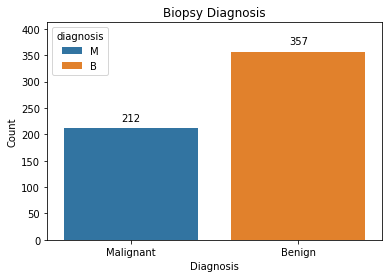

In [7]:
ax = sns.countplot(x='diagnosis', hue='diagnosis', data=df, palette='tab10', dodge=False)
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Biopsy Diagnosis')
plt.xticks([0,1], ['Malignant', 'Benign'])

# expand the y axis so that the "Count" values show properly
plt.ylim(0, ax.get_ylim()[1] * 1.1)

# insert the "Count" value on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
plt.show()

In [ ]:
df_x = df.iloc[:,2:]

df_y = df.iloc[:,1]


In [ ]:
train, test = train_test_split(df, test_size=0.35, random_state = 38)
print("Training Data :", train.shape)
print("Testing Data :", test.shape)

Training Data : (369, 32)
Testing Data : (200, 32)


In [ ]:
train_df = train.iloc[:,1:]
test_df = test.iloc[:,1:]

print("Training Data :", train_df.shape)
print("Testing Data :", test_df.shape)

Training Data : (369, 31)
Testing Data : (200, 31)


In [ ]:
train_df_x = train_df.iloc[:,1:]
train_df_x = MinMaxScaler().fit_transform(train_df_x)

test_df_x = test_df.iloc[:,1:]
test_df_x = MinMaxScaler().fit_transform(test_df_x)

print(train_df_x.shape)
print(test_df_x.shape)

(369, 30)
(200, 30)


In [ ]:
train_df_y = train_df.iloc[:,:1]
train_df_y[train_df_y=='M'] = 0
train_df_y[train_df_y=='B'] = 1
train_df_y = train_df_y.astype('float32')


test_df_y = test_df.iloc[:,:1]
test_df_y[test_df_y=='M'] = 0
test_df_y[test_df_y=='B'] = 1
test_df_y = test_df_y.astype('float32')

print(train_df_y.shape)
print(test_df_y.shape)

(369, 1)
(200, 1)


<AxesSubplot:>

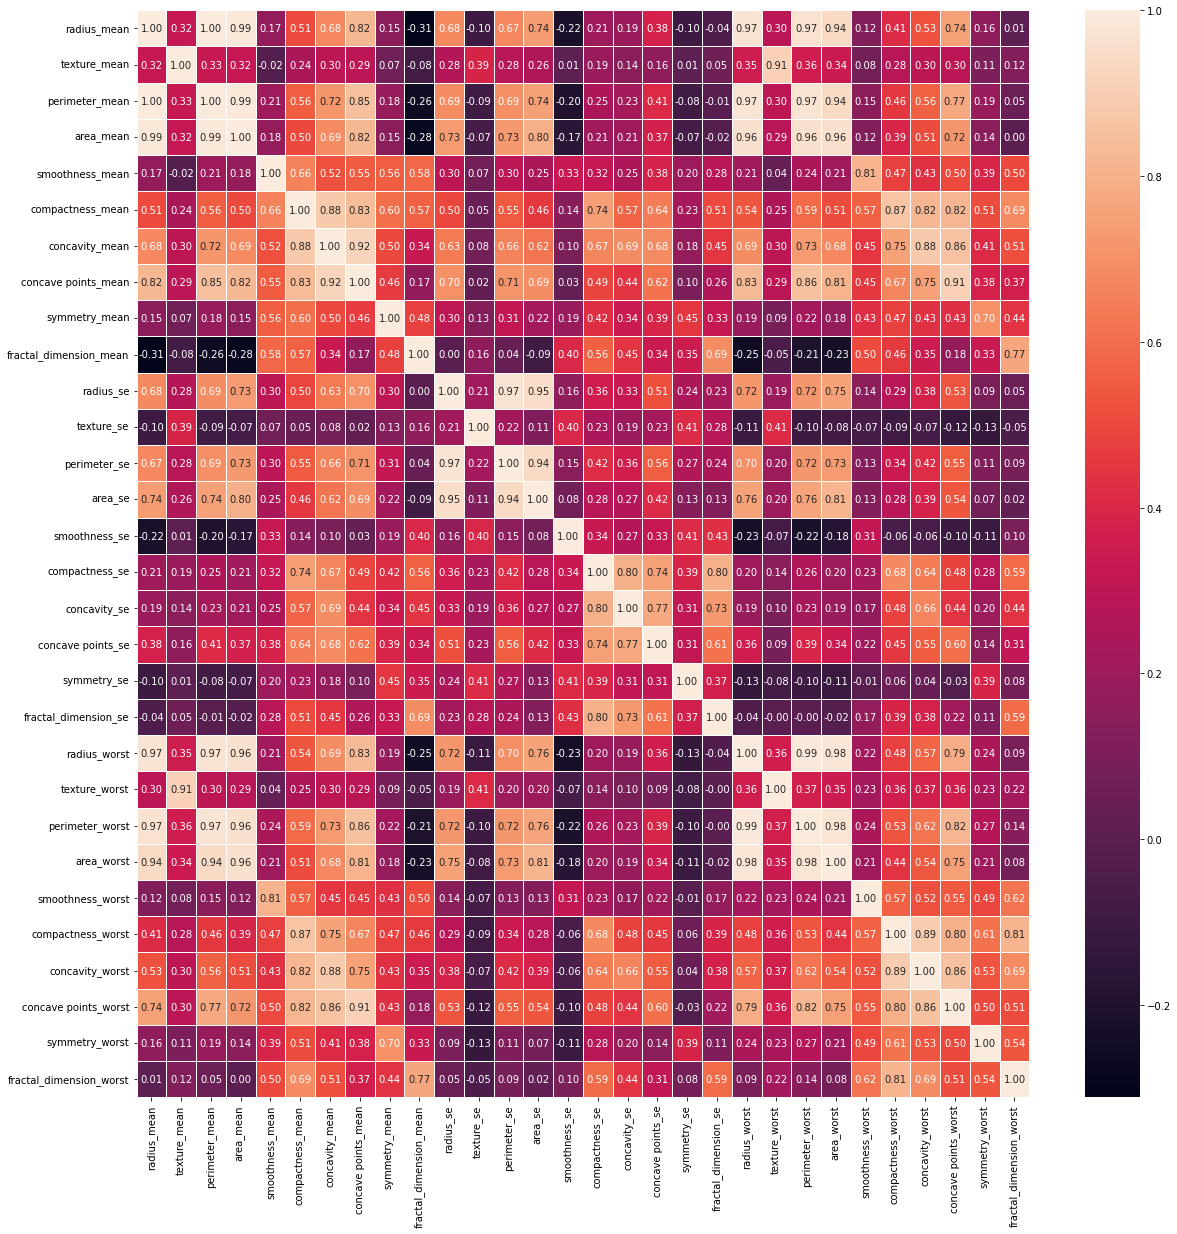

In [ ]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_x.corr(), annot=True, linewidths=.5, fmt='.2f', ax=ax)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=(30,), bias_initializer='random_normal', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='relu', bias_initializer='random_normal', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid', bias_initializer='random_normal')
])

In [ ]:
# compile the model with binary cross-entropy loss and Adam optimizer, and add precision, recall, and F1 score to the metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)


# train the model using the training set
history = model.fit(train_df_x, train_df_y, epochs=100, batch_size=32, validation_data=(test_df_x, test_df_y))

# Evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_df_x, test_df_y, verbose=0)

# Print the results
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
print('Test Precision:', test_precision)
print('Test Recall:', test_recall)


Epoch 1/100
12/12 [==============================] - 4s 103ms/step - loss: 0.6941 - accuracy: 0.5908 - precision: 0.6364 - recall: 0.8147 - val_loss: 0.6551 - val_accuracy: 0.7200 - val_precision: 0.7041 - val_recall: 0.9520
Epoch 2/100
12/12 [==============================] - 0s 36ms/step - loss: 0.6636 - accuracy: 0.6775 - precision: 0.6969 - recall: 0.8621 - val_loss: 0.6352 - val_accuracy: 0.7950 - val_precision: 0.7692 - val_recall: 0.9600
Epoch 3/100
12/12 [==============================] - 0s 23ms/step - loss: 0.6512 - accuracy: 0.6856 - precision: 0.6959 - recall: 0.8879 - val_loss: 0.6115 - val_accuracy: 0.7900 - val_precision: 0.7610 - val_recall: 0.9680
Epoch 4/100
12/12 [==============================] - 0s 25ms/step - loss: 0.6316 - accuracy: 0.7344 - precision: 0.7310 - recall: 0.9138 - val_loss: 0.5949 - val_accuracy: 0.8300 - val_precision: 0.8013 - val_recall: 0.9680
Epoch 5/100
12/12 [==============================] - 0s 11ms/step - loss: 0.6108 - accuracy: 0.7561 - p

7/7 [==============================] - 0s 1ms/step
Confusion Matrix: 
[[ 72   3]
 [ 13 112]]


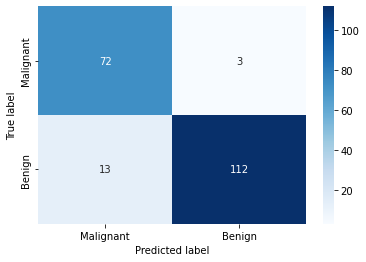

In [ ]:
# predict classes for the test set
y_pred_prob = model.predict(test_df_x)
y_pred = (y_pred_prob > 0.5).astype(int)

# generate confusion matrix
cm = confusion_matrix(test_df_y, y_pred, labels=[0,1])

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])

plt.xlabel('Predicted label')
plt.ylabel('True label')

# print confusion matrix
print('Confusion Matrix: ')
print(cm)
plt.show()


In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=b0e6ccc2326d4812ff15d566bffae18cc48d0169178b595794cf486fe80a9d00
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
Successfully built umap-learn


In [ ]:
!pip install pynndescent

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=a28ef476f7e4f872cd0bec98f942e382c772ac98cb54e551b2f6018d42deaed7
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built pynndescent


In [ ]:
!pip install datashader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 KB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59439 sha256=211ff3dcc3a7783c14dbe3cc19d80d1067bd5ca1a5af80e42272ed052985c40a
  Stored in directory: /root/.cache/pip/wheels/6d/79/c4/c425774559165f472d32e5ef592ff9a71179abb31f05dbc98b
Successfully built datashape


In [ ]:
!pip install umap-learn
!pip install pynndescent
!pip install datashader
import numpy
import scipy
import sklearn
import numba
import pynndescent
import matplotlib
import datashader
import holoviews
import umap
import umap.plot
from sklearn.datasets import load_digits

<AxesSubplot:>

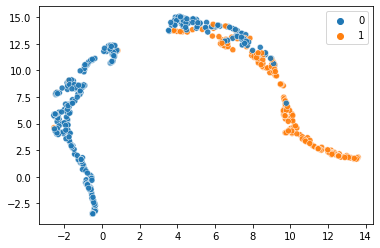

In [ ]:
# Perform UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(df_x)

# Create a scatter plot
sns.scatterplot(
    embedding[:, 0], embedding[:, 1], hue=df.iloc[:,1].astype('category').cat.codes,
    cmap='viridis', alpha=0.9, legend = "full"
)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=100)

parameter_search = {
    'hidden_layer_sizes': [(15,3), (30,10), (100,33), (60,20)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.001, 0.05, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive']
}

from sklearn.model_selection import GridSearchCV
g_search = GridSearchCV(mlp, parameter_search, n_jobs=-1, cv=4)
g_search.fit(train_df_y, train_df_y)

GridSearchCV(cv=4, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.001, 0.05, 0.01, 0.1],
                         'hidden_layer_sizes': [(15, 3), (30, 10), (100, 33),
                                                (60, 20)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:
means = g_search.cv_results_['mean_test_score']
stds = g_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, g_search.cv_results_['params']):
  print("%0.3f (+/-%0.03f) for %r" % (mean, std*2, params))

0.721 (+/-0.322) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (15, 3), 'learning_rate': 'constant', 'solver': 'sgd'}
1.000 (+/-0.000) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (15, 3), 'learning_rate': 'constant', 'solver': 'adam'}
0.814 (+/-0.373) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (15, 3), 'learning_rate': 'adaptive', 'solver': 'sgd'}
1.000 (+/-0.000) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (15, 3), 'learning_rate': 'adaptive', 'solver': 'adam'}
1.000 (+/-0.000) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (30, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
1.000 (+/-0.000) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (30, 10), 'learning_rate': 'constant', 'solver': 'adam'}
1.000 (+/-0.000) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (30, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}
1.000 (+/-0.000) for {'activation':

In [ ]:
print('Best parameters found: \n', g_search.best_params_)

Best parameters found: 
 {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (15, 3), 'learning_rate': 'constant', 'solver': 'adam'}
